## Sales Data

In this exercise, we're going to explore our sales data a bit more graphically.

Read the superstore data in from the `superstore_sales` csv by running the cell below.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Set the style to use the ggplot style as default
plt.style.use('ggplot')


sales = pd.read_csv('data/superstore_sales.csv')
sales.head()

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,...,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
0,1,3,13/10/2010,Low,6,261.5400,0.04,Regular Air,-213.25,38.94,...,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,20/10/2010
1,49,293,01/10/2012,High,49,10123.0200,0.07,Delivery Truck,457.81,208.16,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,02/10/2012
2,50,293,01/10/2012,High,27,244.5700,0.01,Regular Air,46.71,8.69,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,03/10/2012
3,80,483,10/07/2011,High,30,4965.7595,0.08,Regular Air,1198.97,195.99,...,Clay Rozendal,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,R380,Small Box,0.58,12/07/2011
4,85,515,28/08/2010,Not Specified,19,394.2700,0.08,Regular Air,30.94,21.78,...,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50,30/08/2010


Note that not all of the columns are shown above, if you want to see the names of all of the columns, you can run `df.columns`

In [2]:
sales.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Order Priority', 'Order Quantity',
       'Sales', 'Discount', 'Ship Mode', 'Profit', 'Unit Price',
       'Shipping Cost', 'Customer Name', 'Province', 'Region',
       'Customer Segment', 'Product Category', 'Product Sub-Category',
       'Product Name', 'Product Container', 'Product Base Margin',
       'Ship Date'],
      dtype='object')

### Bar Charts

You can view the unique values in a column by running `df['col_name'].unique()`, use this to view the unique shipping modes.

Do this on the `"Ship Mode"` column from the `sales` data frame.

In [3]:
# Write your code to view unique shipping modes here
sales['Ship Mode'].unique()

array(['Regular Air', 'Delivery Truck', 'Express Air'], dtype=object)

Draw a bar graph of the three shipping modes and the **average shipping cost per order** for each one. Shipping cost is in the column `"Shipping Cost"`.

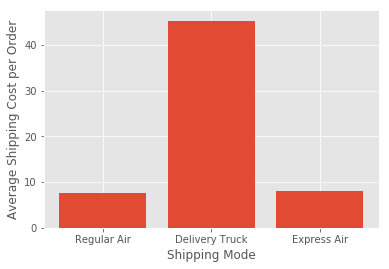

In [4]:
shipping_modes = sales['Ship Mode'].unique()
average_shipping_costs = []

for mode in shipping_modes:
    mode_df = sales[sales['Ship Mode'] == mode]
    total_shipping_cost_for_mode = mode_df['Shipping Cost'].sum()
    mode_orders = len(mode_df)
    average_shipping_cost_for_mode = total_shipping_cost_for_mode / mode_orders
    average_shipping_costs.append(average_shipping_cost_for_mode)    

xs = range(len(shipping_modes))

plt.bar(xs, average_shipping_costs)
plt.ylabel("Average Shipping Cost per Order")
plt.xlabel("Shipping Mode")

plt.xticks(xs, shipping_modes)
plt.show()

## Line Chart

Write a function to that takes a parameter of a string in the format 'DD/MM/YYYY' and returns only the year as an integer.

In [5]:
def get_year(date_str):
    return int(date_str.split('/')[-1])

Map this function onto the column `"Order Date"` in order and set the result to a new column `"Order Year"`.

In [6]:
sales['Order Year'] = sales['Order Date'].map(get_year)

Create a Line Chart to show total annual profits for 2009-2012

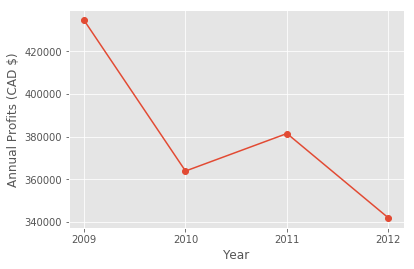

In [7]:
years = [2009, 2010, 2011, 2012]
profits = []

for year in years:
    profits.append(
        sales.loc[sales['Order Year'] == year, 'Profit'].sum()
    )

plt.plot(years, profits, marker='o')
plt.xticks(years)
plt.xlabel('Year')
plt.ylabel('Annual Profits (CAD $)')

plt.show()

## Boxplots

The manager for the Province `Newfoundland` would like to know the spread of the revenues from orders from each of their product categories. The product categories are found in the `"Product Category"` column, the revenues are found in the `"Sales"` column. 

Plot the boxplots of revenue for each of the product categories for only the province Newfoundland. 

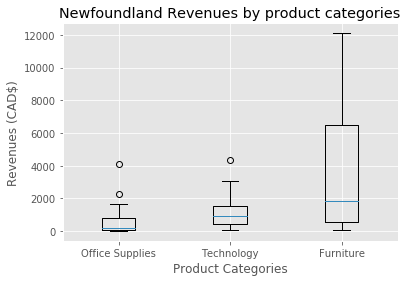

In [8]:
newfoundland_sales = sales[sales['Province'] == 'Newfoundland']

segments = newfoundland_sales['Product Category'].unique()
segment_profits = [newfoundland_sales.loc[(sales['Product Category'] == segment), "Sales"]
                   for segment in segments]

plt.boxplot(segment_profits, labels=segments)
plt.xlabel('Product Categories')
plt.ylabel('Revenues (CAD$)')
plt.title('Newfoundland Revenues by product categories')
plt.show()

## Graphing Challenge

It is not expected to be able to reproduce this graph, particularly not at this stage of the course, you might want to come back to it, but take it as a challenge to see how close you can get.

In [9]:
observed = pd.read_csv('data/river_flow_historical_data.csv', names=['Datetime', 'Flow'])
prediction = pd.read_csv('data/river_flow_prediction_data.csv', names=['Datetime', 'Flow'])

observed['Datetime'] = pd.to_datetime(observed['Datetime'])
prediction['Datetime'] = pd.to_datetime(prediction['Datetime'])

# Note that these are Series, not Data Frames
observed = pd.Series(observed.set_index('Datetime')['Flow'])
prediction = pd.Series(prediction.set_index('Datetime')['Flow'])

print(observed.head())
print(prediction.head())

Datetime
2016-12-23 12:00:00    0.739948
2016-12-23 12:10:00    0.720764
2016-12-23 12:20:00    0.652249
2016-12-23 12:30:00    0.697665
2016-12-23 12:40:00    0.715862
Name: Flow, dtype: float64
Datetime
2016-12-25 16:00:00    0.950000
2016-12-25 16:10:00    1.495647
2016-12-25 16:20:00    1.711233
2016-12-25 16:30:00    1.744296
2016-12-25 16:40:00    1.933412
Name: Flow, dtype: float64


The graph below was created using matplotlib. Try and reproduce it. The observed data and forcecast data is loaded for you using the cell above.

![graph challenge graph](data/graph.png)

Some hints:
* `plt.semilogy(x, y)` will give you a semilog line chart with a log base 10 x axis
* `plt.fill_between(x, y_1, y_2)` will fill the graph between x, y_1 and y_2
* `plt.axhline(y_scalar)` will give you a horizontal line at y
* You can order lines/scatter plots by providing a parameter `zorder` - the higher the z-order, the closer to the front of the graph (i.e. a z-order of 2 will be superimposed on top of 1)

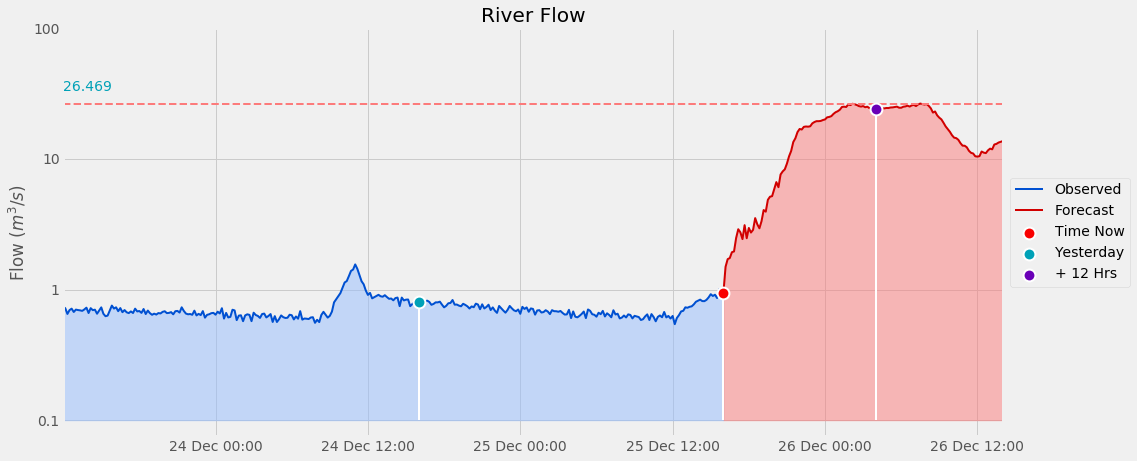

In [10]:
# Don't change this code
import datetime

plt.style.use('fivethirtyeight')

now = max(observed.index)
yesterday = now - datetime.timedelta(days=1)
plus_12_hours = now + datetime.timedelta(hours=12)

x_ticks = pd.date_range('2016-12-24 00:00', '2016-12-26 16:00', freq='12H')
x_tick_labels = [x.strftime('%d %b %H:%M') for x in x_ticks]
y_ticks = [0.1, 1, 10, 100]

max_value = max(pd.concat([observed, prediction]))

observed_line_color = '#0050d1'
prediction_line_color = '#d10000'
now_scatter_color = '#f90000'
yesterday_scatter_color = '#00a1b7'
plus_12_hours_scatter_color = '#6a00b7'
observed_fill_color = '#96beff'
prediction_fill_color = '#fc7b7b'
max_value_text_color = '#00a1b7'
max_value_line_color = '#fc7b7b'

plt.figure(figsize=(15, 7))


# Your code here

# Start with your line graphs for observed and forecast points
# These are semilogy plots, the line width is 2, the colors are given above
# Remember to label your lines so they appear on the graph

plt.semilogy(
    observed.index,
    observed,
    linewidth=2,
    color=observed_line_color,
    label='Observed',
    zorder=2
)
plt.semilogy(
    prediction.index,
    prediction,
    linewidth=2,
    color=prediction_line_color,
    label='Forecast')

# Now add the individual scatter plots
# These should be at the front (parameter name `zorder`),
# they have a white edgecolor (parameter name `edgecolor`)
# Their line width is 2 (parameter name `lw`)
# They have a size (parameter name `s`) of 140

plt.scatter(
    [now],
    [observed.loc[now]],
    color=now_scatter_color,
    edgecolor='white',
    lw=2,
    s=140,
    label='Time Now',
    zorder=3
)
plt.scatter(
    [yesterday],
    [observed.loc[yesterday]],
    color=yesterday_scatter_color,
    edgecolor='white',
    lw=2,
    s=140,
    label='Yesterday',
    zorder=3
)
plt.scatter(
    [plus_12_hours],
    [prediction.loc[plus_12_hours]],
    color=plus_12_hours_scatter_color,
    edgecolor='white',
    lw=2,
    s=140,
    label='+ 12 Hrs',
    zorder=3
)


# The white lines have no x length, they start and end at the same time
# The lines on the y axis start at 0.1 and extend up to the flow value at that time

plt.plot(
    [now, now],
    [0.1, observed.loc[now]],
    color='white',
    linewidth=2,
    zorder=1
)
plt.plot(
    [yesterday, yesterday],
    [0.1, observed.loc[yesterday]],
    color='white',
    linewidth=2,
    zorder=1
)
plt.plot(
    [plus_12_hours, plus_12_hours],
    [0.1, prediction.loc[plus_12_hours]],
    color='white',
    linewidth=2,
    zorder=1
)

# Fill the graphs below between 0.1 and the observed/predicted value
# The opacity (`alpha`) of the fill should be 0.5

plt.fill_between(
    observed.index,
    0.1,
    observed,
    color=observed_fill_color,
    alpha=0.5
)
plt.fill_between(
    prediction.index,
    0.1,
    prediction,
    color=prediction_fill_color,
    alpha=0.5
)

# Create a horizontal line at the maximum value of the observed or prediction
# using plt.axhline(), the linewidth should be 2

plt.axhline(
    max_value,
    linewidth=2,
    linestyle='--',
    color=max_value_line_color
)

# You can add text to your graph to indicate the maximum value
# using plt.text(x, y, text)
# the font size should be 14 (parameter name `fontsize`)

plt.text(
    min(observed.index),
    10 ** (np.log10(max_value) + 0.1), 
    r'{}'.format(round(max_value, 3)),
    fontsize=14,
    color=max_value_text_color
)

# x and y ticks take an array of values as the first parameter
# and an array of labels as their second parameter
# the tick positions and labels are already defined above

plt.yticks(y_ticks, y_ticks)
plt.xticks(x_ticks, x_tick_labels)

# The x limit should be set between the minimum observed date
# and the maximum prediction date

plt.xlim(min(observed.index), max(prediction.index))


# Add a y label and a title for your graph

plt.ylabel('Flow $(m^3/s)$')
plt.title('River Flow')


# Add your legend, you can put the legend outside of the graph
# by providing paramaters `loc='center left', bbox_to_anchor=(1, 0.5)`

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()